In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plFuns import *

In [25]:
countries=['EN','ES','FR','IT','NL']
seasons=pd.Series({_cntr:Season(_cntr) for _cntr in countries})

manu=seasons['EN'].Teams['Man United']
citeh=seasons['EN'].Teams['Man City']
itstotlads=seasons['EN'].Teams['Tottenham']
chelsea=seasons['EN'].Teams['Chelsea']

In [3]:
seasons['EN'].all

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,2017-08-12,Brighton,Man City,0,2,A,0,0,D,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,2017-08-12,Everton,Stoke,1,0,H,1,0,H,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42
5,E0,2017-08-12,Southampton,Swansea,0,0,D,0,0,D,...,1.75,19,-0.75,1.83,1.78,2.16,2.10,1.56,4.25,6.85
6,E0,2017-08-12,Watford,Liverpool,3,3,D,2,1,H,...,1.99,21,1.00,1.90,1.84,2.13,2.04,6.88,4.27,1.56
7,E0,2017-08-12,West Brom,Bournemouth,1,0,H,1,0,H,...,1.70,22,-0.25,2.12,2.08,1.85,1.81,2.65,3.21,3.02
8,E0,2017-08-13,Man United,West Ham,4,0,H,1,0,H,...,2.16,19,-1.50,2.01,1.96,1.95,1.92,1.31,5.79,12.01
9,E0,2017-08-13,Newcastle,Tottenham,0,2,A,0,0,D,...,2.01,20,0.75,2.06,2.00,1.92,1.87,4.82,3.90,1.80


In [29]:
for _season in seasons:
    _season.calibrate()

In [70]:
seasons['EN'].lambd[10]=0
seasons['EN'].tau[10]=0

In [71]:
for _season in seasons:
    _season.SimulateRestOfSeason(nScenarios=int(1e4))

In [72]:
seasons['EN'].get_all_results()

,Average Goals Against,Average Goals Scored,Average Points,CL,GA,GF,Points,Win,lambda,tau
Man United,23.10,79.93,86.80,99.36,11,37,38,84.65,1.504,0.000
Chelsea,33.22,68.56,76.31,68.73,14,31,35,5.41,1.244,0.341
Tottenham,26.03,63.50,75.39,65.27,14,30,31,3.24,1.060,0.000
Liverpool,37.36,74.13,74.96,61.99,20,34,31,3.65,1.369,0.267
Man City,25.19,63.51,74.48,58.15,11,52,49,1.77,0.000,0.000
Arsenal,38.16,68.24,72.36,39.42,20,30,30,1.21,1.246,0.297
Burnley,25.97,36.85,65.31,4.73,12,16,31,0.06,0.460,0.000
Leicester,47.29,62.10,62.30,2.32,23,27,26,0.01,1.105,0.547
Watford,58.89,59.88,53.87,0.03,29,26,22,0.00,1.074,0.797
Everton,60.78,43.84,45.25,0.00,29,21,22,0.00,0.572,0.915


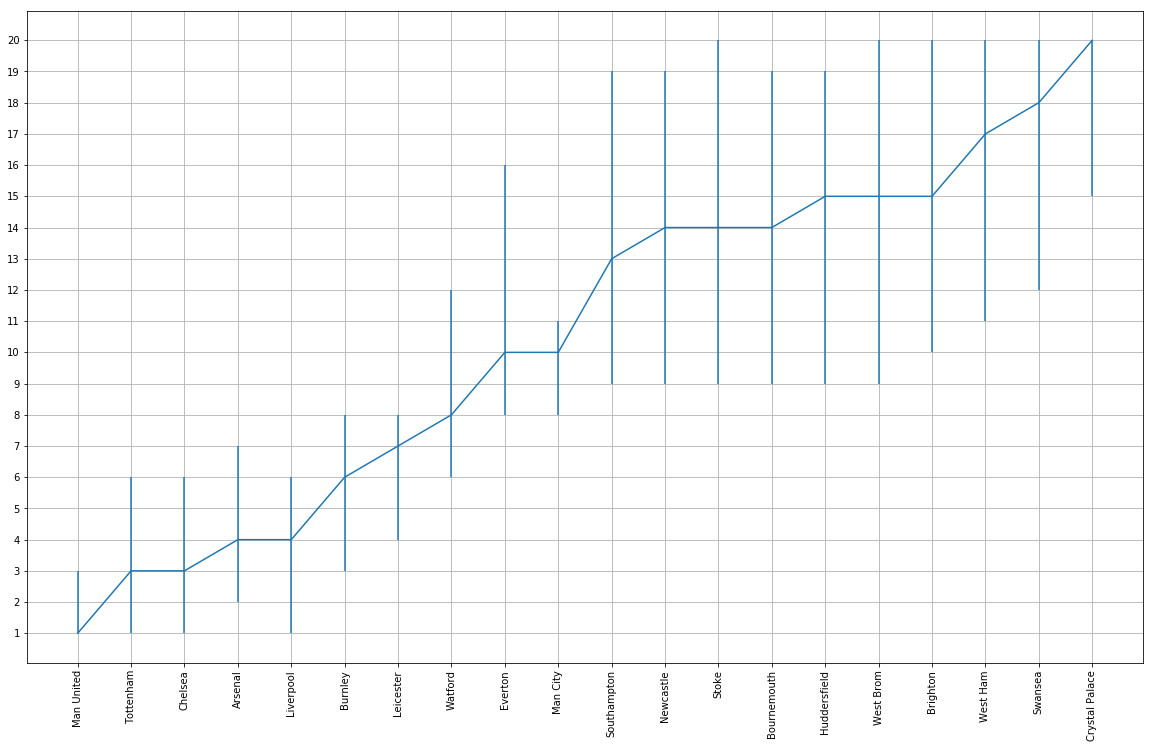

In [63]:
seasons['EN'].conf_int_plot(95,kind='')

In [8]:
manu.__add__(citeh)

array([ 0.2829,  0.1864,  0.5307])

In [7]:
manu + citeh

array([ 0.2488,  0.191 ,  0.5602])

In [10]:
chelsea+manu 

array([ 0.2696,  0.2263,  0.5041])

In [9]:
pl=seasons['EN']

In [17]:
plt.hist(pl.PointsPerTeam[pl.PointsPerTeam.argmax(axis=0)!=10].argmax(axis=0))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 100000

In [24]:
pl.PointsPerTeam[:,pl.PointsPerTeam.argmax(axis=0)!=10].argmax(axis=0)

array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  4,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  4, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11,  9, 11, 11, 11, 11, 11, 11, 11, 11, 11,  4,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11